In [2]:
!date

Tue Mar 30 19:18:40 WIB 2021


In [3]:
!python3 -m pip install pandas

In [128]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rahmanhasri/hacktiv8-intro-python/main/train.csv');
# read_excel
# read_json
# read_sql

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
# Series

# List
l = [100, 200, 300]
index = [1, 2, 3]
ds = pd.Series(data=l, index=index)

# Dictionary
d = {'a': 1000, 'b': 2000, 'c': 3000}
ds2 = pd.Series(data=d)

ds
ds.keys()
ds.values

len(ds)

ds.shape

# Accessing series
ds[1]
ds2[-1]
ds2.keys()
# ds2['b']

ds2.loc['b']

ds.iloc[0]
ds.iloc[1:3]

2    200
3    300
dtype: int64

In [45]:
# Dataframe

# From list
l2 = [['Thomas', 100], ['nicholas', 200], ['johnson', 300]]
df1 = pd.DataFrame(data=l2, columns=['Name', 'Money'])

df1

# From dictionary
dictionary = {'Name': ['Thomas', 'Nicholas', 'Johnson'], 'Money': [100, 200, 300]}
df2 = pd.DataFrame(dictionary)

df2

df2.keys()
df2.index
df2.values
df2.axes[1]

Index(['Name', 'Money'], dtype='object')

In [65]:
# accessing Dataframe
df.axes[1]

# df.info()

df.describe()

df['Pclass'].value_counts()

df.nunique()

df.head()

df.tail()

df.loc[0: 10]

df.iloc[0:10]

# query / conditional filtering
df.loc[df['Sex'] == 'female', 'Age'].min()

0.75

In [67]:
# Join dataframe from two series
city_revenues = pd.Series([4200, 8000, 6500], index=['Amsterdam', 'Toronto', 'Tokyo'])

city_employee_count= pd.Series({ 'Amsterdam': 5, 'Tokyo': 8, 'Toronto': 10 })
city_data = pd.DataFrame({ 'revenue': city_revenues, 'employee_count': city_employee_count })

city_data

,revenue,employee_count
Amsterdam,4200,5
Tokyo,6500,8
Toronto,8000,10


In [94]:
# querying and conditional

df[df['Sex'] == 'male']
df[(df['Sex'] == 'male') & (df['Survived'] == 0)]
df[['Age', 'Pclass', 'Cabin']][(df['Sex'] == 'male') & (df['Survived'] == 0)].count()

df[['Age', 'Pclass', 'Cabin']][(df['Sex'] == 'male') & (df['Survived'] == 0)].value_counts()

df[['Age']][(df['Sex'] == 'female') & (df['Survived'] == 1)].value_counts()

df[['Age', 'Name']][(df['Sex'] == 'female') & (df['Survived'] == 1)].sort_values('Age').head(20)

df[['Age', 'Pclass', 'Cabin']][(df['Sex'] == 'female') & (df['Survived'] == 1)].notnull()

# aggregate
df.describe()
df[['Age', 'Pclass', 'Cabin']][(df['Sex'] == 'male') & (df['Survived'] == 1)]['Age'].max()

df.median()
df.count()

df.std()



PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

In [133]:
# Data cleaning
# type of dirty data
# - null
# - ''
# - NaN
# - Incorrect timestamp

df.isnull()

df.isnull().sum()

# drop data
# droppeddf = df.dropna()
# droppeddf

# drop columns

# help(df['Age'].fillna)
# df['Age'].fillna(value=0, inplace=True)
# df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df[df['Age'] == df['Age'].mean()] # check


# df['Age'].mean()
# df.isnull().sum()
# df[df['Age'] == 0]

# inplace False
# df.isnull().sum()
df['Age'] = df['Age'].fillna(value=0)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
# combining dataset
# concat
first_10 = df.head(10) 
last_10 = df.tail(10)

combined = pd.concat([first_10, last_10])

combined
# merge
data = [['Braund, Mr. Owen Harris', 80, 177.0], ['Heikkinen, Miss. Laina', 78, 180.0], ['Montvila, Rev. Juozas', 87, 165.0]]
df3 = pd.DataFrame(data, columns=['Name', 'Weight', 'Height'])
df4 = pd.merge(df, df3, on='Name')
df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Weight,Height
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S,80,177.0
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,78,180.0
2,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,87,165.0


In [146]:
# group by
# help(df.groupby)
df.groupby('Pclass').mean()
df.groupby('Pclass').count()

df.groupby(['Pclass', 'Sex']).mean()
df.groupby(['Pclass', 'Sex'])['Fare'].sum()


Pclass  Sex   
1       female    9975.8250
        male      8201.5875
2       female    1669.7292
        male      2132.1125
3       female    2321.1086
        male      4393.5865
Name: Fare, dtype: float64

In [161]:
# Manipulating column
titanic = df.copy()

# titanic.info()

titanic['PassengerIdxAge'] = titanic['PassengerId'].apply(str) + 'x' + titanic['Age'].apply(str)
titanic

titanic['Age'].nunique()

# str(99)
def pclass_name(x):
    if x == 1:
        x = '1st Class'
    elif x == 2:
        x = '2nd Class'
    elif x == 3:
        x = '3rd Class'
    return x

titanic['Pclass'] = titanic['Pclass'].apply(lambda x: pclass_name(x))

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerIdxAge
0,1,0,3rd Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1x22.0
1,2,1,1st Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2x38.0
2,3,1,3rd Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3x26.0
3,4,1,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4x35.0
4,5,0,3rd Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5x35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2nd Class,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,887x27.0
887,888,1,1st Class,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,888x19.0
888,889,0,3rd Class,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,NaN,S,889x0.0
889,890,1,1st Class,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,890x26.0


<AxesSubplot:xlabel='Age'>

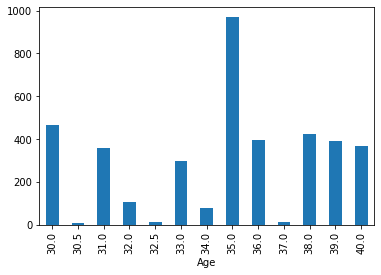

In [169]:
%matplotlib inline

# titanic[titanic['Sex'] == 'female'].groupby('Age')['Fare'].sum().plot()

titanic[(titanic['Sex'] == 'female') & (titanic['Age'] >= 30) & (titanic['Age'] <= 40)].groupby('Age')['Fare'].sum().plot(kind='bar')



In [173]:
# !python3 -m pip install openpyxl
titanic.to_excel('./titanic.xlsx')